In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import json

In [2]:
with open("180774784936665.json","r") as stack_history:
		stack=json.load(stack_history)['closingPriceChartData']

In [3]:
stack_data ={
'Date': [],
'Open': [], 
'High': [], 
'Low': [],
'Close': [], 
'Volume': [],
'Color' : []
}

In [4]:
from datetime import datetime, timedelta

In [5]:
basetime_sec= -17887996800
basedate = datetime(2024, 5, 15, 0, 0, 0) 
print(basedate + timedelta(seconds= stack[0]['dEven']-basetime_sec))

2001-03-25 00:00:00


In [6]:
for day in stack:
    stack_data['Date'].append(basedate + timedelta(seconds= day['dEven']-basetime_sec))
    stack_data['Open'].append(day['priceFirst'])
    stack_data['Close'].append(day['pDrCotVal'])
    stack_data['High'].append(day['priceMax'])
    stack_data['Low'].append(day['priceMin'])
    stack_data['Volume'].append(day['qTotTran5J'])
    stack_data['Color'].append('crimson' if day['priceFirst']>day['pDrCotVal'] else 'mediumseagreen' )

In [7]:
df=pd.DataFrame(stack_data)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

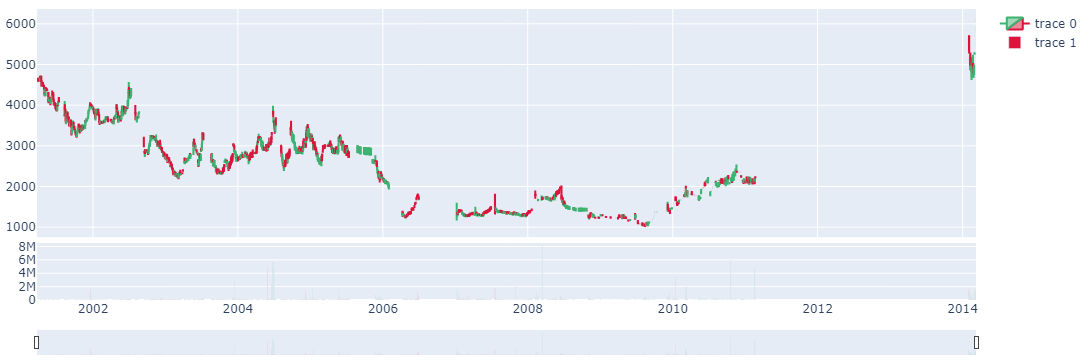

In [11]:
fig= make_subplots(rows=2,shared_xaxes=True, vertical_spacing = 0.02 , row_heights=[0.8, 0.2])


fig.add_trace(
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color= 'mediumseagreen',
        decreasing_line_color= 'crimson',)
    , row=1, col=1,
)

fig.add_trace(
    go.Bar(
        x=df['Date'],
        y=df['Volume'],
        marker= dict(color=df['Color']),)
    ,row=2, col=1)


fig.update_xaxes( row=1, col=1, rangeslider_visible=False)
fig.update_xaxes( row=2, col=1, rangeslider_visible=True)

fig.update_layout(
    margin=dict(l=5, r=5, t=5, b=5),
    xaxis2_rangeslider_thickness=0.07
)

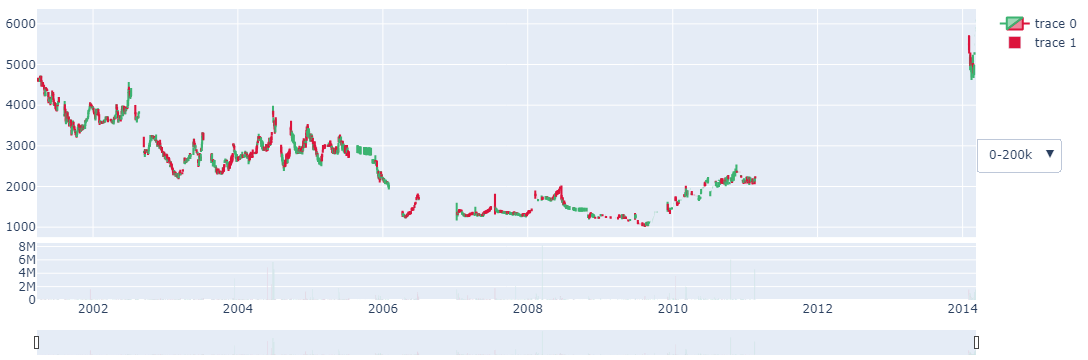

In [12]:
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [{"yaxis2.range": [0, 200000]}],
                    "label": "0-200k",
                    "method": "relayout"
                },
                {
                    "args": [{"yaxis2.range": [0, 1000000]}],
                    "label": "0-2M",
                    "method": "relayout"
                },
                {
                    "args": [{"yaxis2.range": [0, 8000000]}],
                    "label": "0-8M",
                    "method": "relayout"
                }
            ],
            "direction": "down",
            "showactive": True,
            "x": 1,
            "xanchor": "left",
            "y": 0.5,
            "yanchor": "middle"
        }
    ]
)
fig.show()

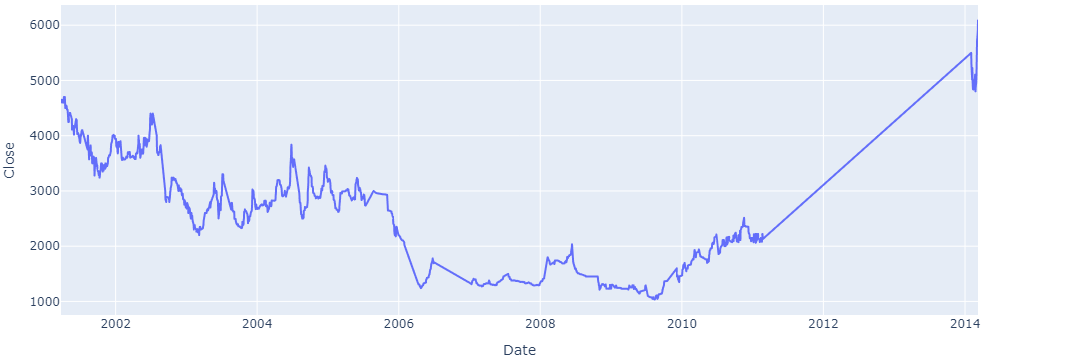

In [25]:
import plotly.express as px

fig2 = px.line(df, x="Date", y="Close")

fig2.update_layout( margin=dict(l=5, r=110, t=5, b=5),)
fig2.show()

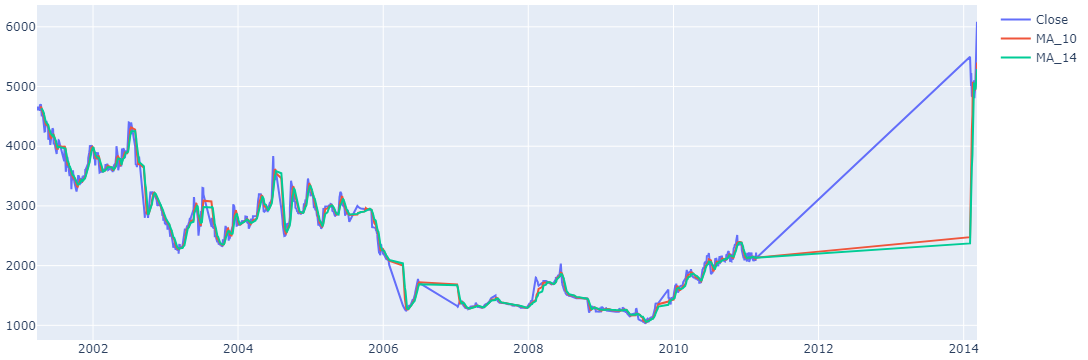

In [14]:
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_14'] = df['Close'].rolling(window=14).mean()
fig3 = go.Figure()
fig3.update_layout( margin=dict(l=5, r=5, t=5, b=5),)
fig3.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))
fig3.add_trace(go.Scatter(x=df['Date'], y=df['MA_10'], mode='lines', name='MA_10'))
fig3.add_trace(go.Scatter(x=df['Date'], y=df['MA_14'], mode='lines', name='MA_14'))
fig3.show()

In [33]:
import plotly.io as pio
html_fig1 = pio.to_html(fig, full_html=False, include_plotlyjs='cdn')
html_fig2 = pio.to_html(fig2, full_html=False, include_plotlyjs=False)
html_fig3 = pio.to_html(fig3, full_html=False, include_plotlyjs=False)

# Combine the HTML div strings into a single HTML document
combined_html = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Combined Figures</title>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>
<body>
    <font size="+10">Candle Stick Graph</font>
    {html_fig1}
    <br></br>
    <font size="+10">Closing Price</font>
    {html_fig2}
    <br></br>
    <font size="+10">Moving average</font>
    {html_fig3}
</body>
</html>
"""

# Save the combined HTML to a file
with open('tmp.html', 'w') as file:
    file.write(combined_html)